# T3.3: Analiza e visualiza os datos de COVID de Italia (PANDAS+MongoDB+SeaBorn)
## Ralphy Núñez Mercado
Gráficos con SeaBorn
- Dende Python, conecta coa máquina que ten o dataset de COVID de Italia.
- Carga o dataset nun DataFrame de PANDAS (podes empregar o código da práctica anterior).
- Pon unha variable en función da cal se lea de mongo ou se empregue o read_json() para ler o dataset dun arquivo no seu lugar.
- Debuxa 4 gráficos DIFERENTES (de diferente tipo) con SeaBorn relacionando variables entre eles que queden vistosos e xeitosos. Lembra:
    1. Alomenos un deles ten que ser de dispersión entre dúas variables.
    2. Pon un theme e un palette distinto en cada gráfico.
Máis información:

- https://seaborn.pydata.org/examples/index.html
- https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme
- https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
- https://seaborn.pydata.org/examples/different_scatter_variables.html

### ⬇️ Imports Necesarios 

In [ ]:
from pymongo import MongoClient
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd #!pip install geopandas

### ⛓️‍💥 Conectar con MongoDB a el dataset de Covid Italia

In [ ]:
# %conda install -y pymongo dnspython

#HOST="(...).mongodb.net"
HOST="cluster0.6ej71.mongodb.net"
PORT=27017
USERNAME="ralphynm1000"
PASSWORD="hola1234"

if HOST == 'localhost':
    if not USERNAME:
        cli_mongo = MongoClient(HOST, PORT)
    else:
        cli_mongo = MongoClient(HOST, PORT, USERNAME, PASSWORD)
else:
    cli_mongo = MongoClient(f"mongodb+srv://{USERNAME}:{PASSWORD}@{HOST}/")



### Obtener dataframe

In [18]:
usar_json = False

if usar_json:
   df = pd.read_json('covid_italia.json')
else:
    db_Ejercicios = cli_mongo['Ejercicios']
    covid_italia = db_Ejercicios['covid_italia']
    documentos = list(covid_italia.find())
    df = pd.DataFrame(documentos)


### Visualizar el dataframe

In [19]:
df

,_id,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note,codice_nuts_1,codice_nuts_2,codice_nuts_3
0,67dc6b47e0cb76df9c5092ff,2020-02-24T18:00:00,ITA,17,Basilicata,980,In fase di definizione/aggiornamento,None,NaN,NaN,0,None,None,None,None
1,67dc6b47e0cb76df9c50930d,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,34,Parma,PR,44.801074,10.328350,0,None,None,None,None
2,67dc6b47e0cb76df9c509310,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,37,Bologna,BO,44.494367,11.341721,0,None,None,None,None
3,67dc6b47e0cb76df9c509311,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,38,Ferrara,FE,44.835991,11.618689,0,None,None,None,None
4,67dc6b47e0cb76df9c509315,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,984,In fase di definizione/aggiornamento,None,NaN,NaN,0,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140175,67dc6b5ce0cb76df9c52b681,2022-10-08T17:00:00,ITA,2,Valle d'Aosta,898,Fuori Regione / Provincia Autonoma,None,NaN,NaN,3758,None,ITC,ITC2,None
140176,67dc6b5ce0cb76df9c52b684,2022-10-08T17:00:00,ITA,5,Veneto,24,Vicenza,VI,45.547497,11.545971,411235,None,ITH,ITH3,ITH32
140177,67dc6b5ce0cb76df9c52b686,2022-10-08T17:00:00,ITA,5,Veneto,26,Treviso,TV,45.667546,12.245074,419455,None,ITH,ITH3,ITH34
140178,67dc6b5ce0cb76df9c52b687,2022-10-08T17:00:00,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,388769,None,ITH,ITH3,ITH35


### Gráfico de barras de contagios por provincia 

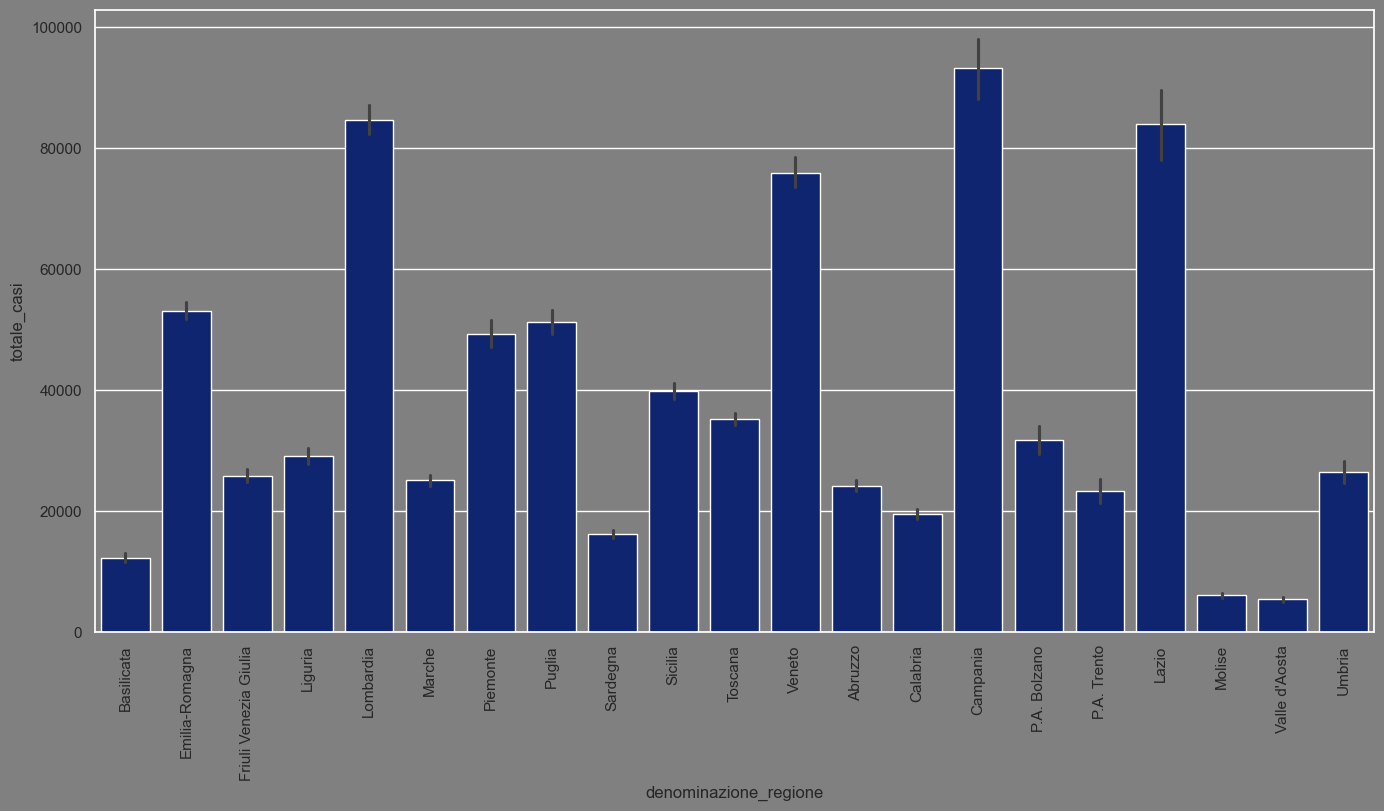

In [20]:

sns.set_palette("dark")
plt.figure(figsize=(14, 8))  
plt.xticks(rotation=90)  
sns.barplot(x=df['denominazione_regione'], y=df['totale_casi'])
plt.tight_layout()  
plt.subplots_adjust(bottom=0.2) 
plt.show()

### Gráfica de tarta de porcentaje de contagios por provincia

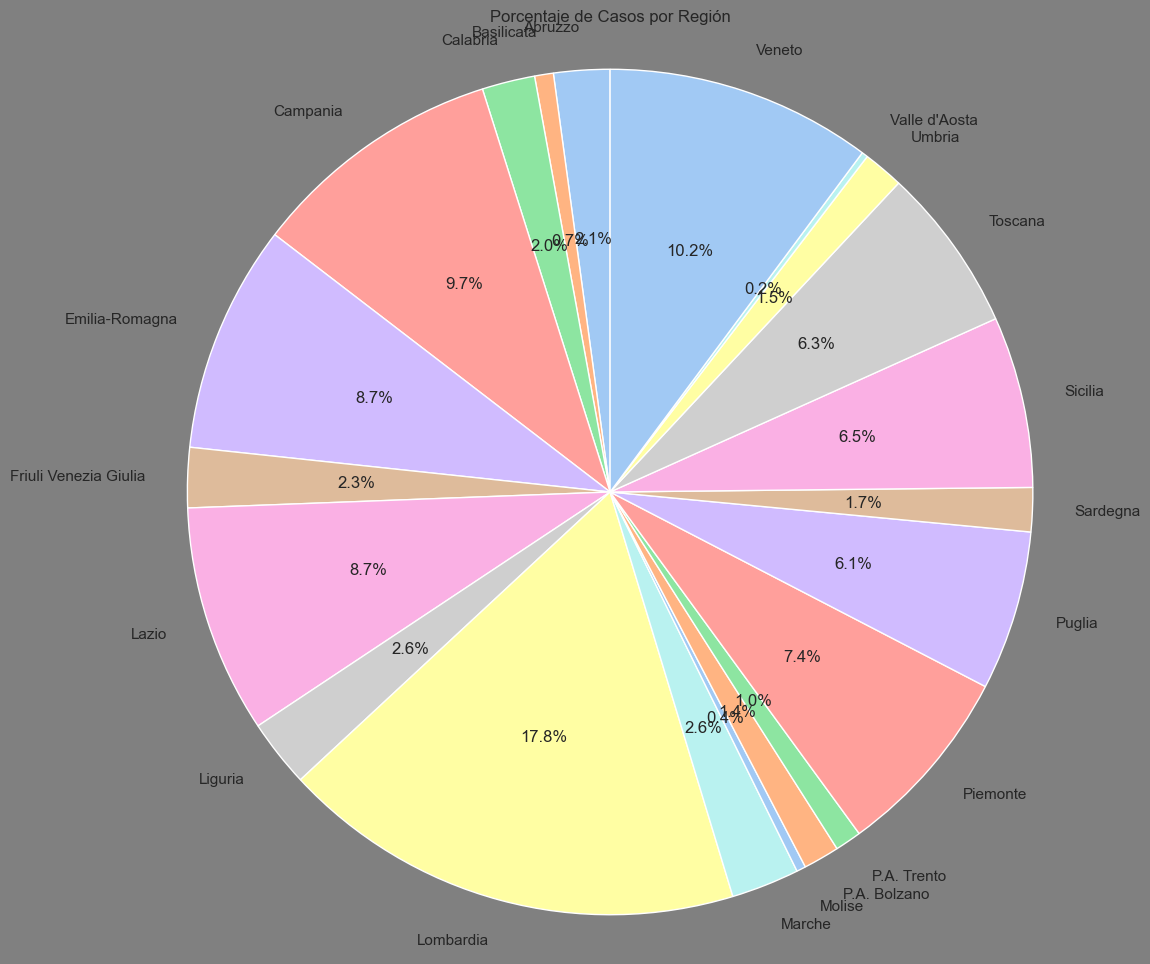

In [21]:
# Eliminar los valores vacíos
df['totale_casi'] = df['totale_casi'].dropna()

# Calcular el total de casos para cada región.
region_totals = df.groupby('denominazione_regione')['totale_casi'].sum()

sns.set_palette("pastel")

plt.figure(figsize=(12,12))
plt.pie(region_totals, labels=region_totals.index, autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje de Casos por Región')
plt.axis('equal') 
plt.show()

### Dispersión de contagios con el mapa de italia superpuesto 

#### Al hacer el gráfico de dispersion este da la silueta de italia por lo que he decidido poner un mapa por encima del gráfico con geopandas 

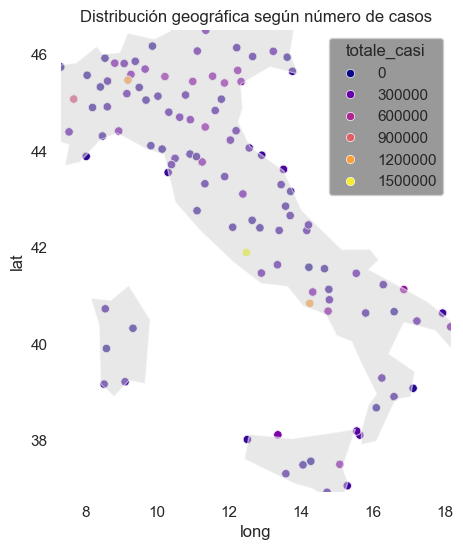

In [22]:
# Cargar el mapa de países
gdf = gpd.read_file(".\\ne_110m_admin_0_countries\\ne_110m_admin_0_countries.shp")

# Usar el sistema de coordenadas EPSG:4326 (lat/lon)
gdf = gdf.to_crs(epsg=4326)

# Solo Italia
italy = gdf[gdf['ADMIN'] == "Italy"]

# Cambiar el color de fondo
sns.set(rc={'axes.facecolor':'grey', 'figure.facecolor':'white'})

# Crear el gráfico de dispersión
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el scatter plot
sns.scatterplot(data=df, x="long", y="lat", hue="totale_casi", palette="plasma", ax=ax)
ax.set_title("Distribución geográfica según número de casos")

# Agregar el mapa de Italia al gráfico
italy.plot(ax=ax, color='lightgrey', alpha=0.5)

# Ajustar la extensión del mapa para que coincida con los datos
min_lon, max_lon = df['long'].min(), df['long'].max()
min_lat, max_lat = df['lat'].min(), df['lat'].max()
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

# Eliminar los bordes blancos
ax.set_frame_on(False)

# Mostrar ambos gráficos
plt.show()


### Gráfica de la ecolucion de los casos por región

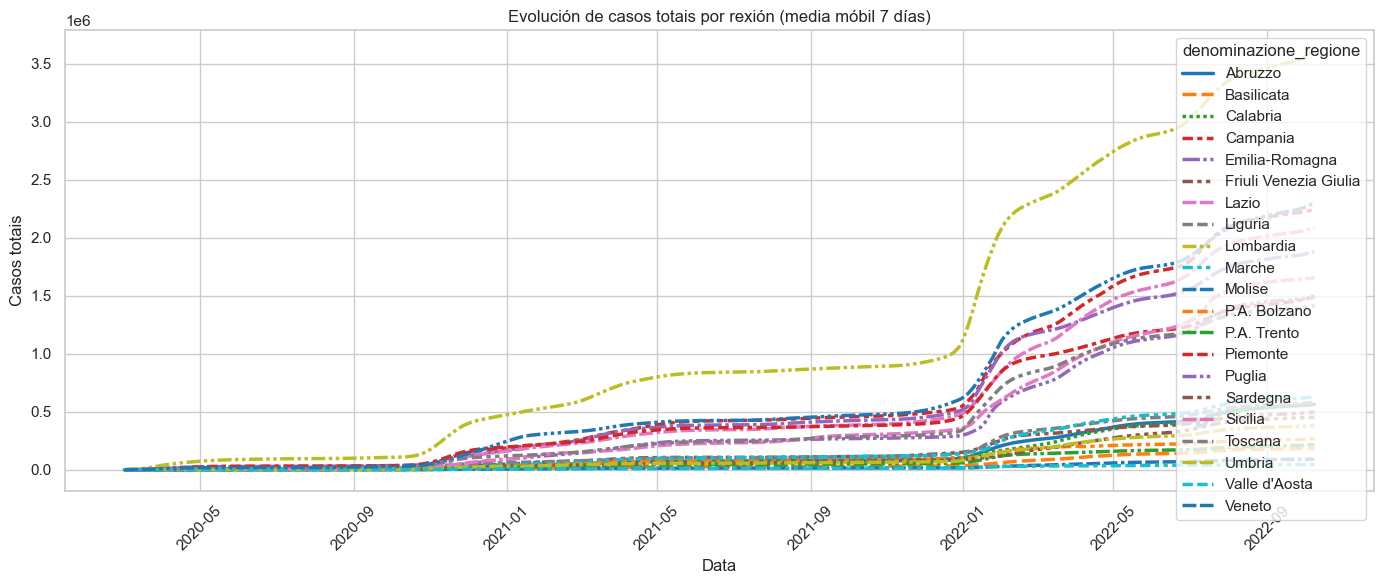

In [23]:
# Convertir a datetime
df["data"] = pd.to_datetime(df["data"])

# Agrupar por fecha y región, y sumar los casos
df_grouped = df.groupby(["data", "denominazione_regione"])["totale_casi"].sum().reset_index()


df_pivot = df_grouped.pivot(index="data", columns="denominazione_regione", values="totale_casi")

# Media móbil para suavizar
df_smooth = df_pivot.rolling(7).mean()

# Dibujar
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_smooth, palette="tab10", linewidth=2.5)
plt.title("Evolución de casos totais por rexión (media móbil 7 días)")
plt.xlabel("Data")
plt.ylabel("Casos totais")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
